# Spotify Data Collection API

In [2]:
# Import necessary libraries
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

In [3]:
# Perform authentication (ADD YOUR CREDENTIALS HERE)
client_id = "cbf123007b33453cb4218e9a25e13f4c"
client_secret = "4398a3bfb2c044f595841eba30b63556"

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Utility Functions 

In [4]:
# Function to get the features of the track based on ID
def get_single_track_features(track_id, playlist_id):
    """
    Function to get the features and other information of a single track.
    """

    meta = sp.track(track_id)
    features = sp.audio_features(track_id)

    # Get the metadata of the track
    name = meta["name"]
    album = meta["album"]["name"]
    artist = meta["album"]["artists"][0]["name"]
    release_date = meta["album"]["release_date"]
    length = meta["duration_ms"]
    popularity = meta["popularity"]
    genres = meta["artists"]

    # Get the audio Features of the track
    acousticness = features[0]["acousticness"]
    key = features[0]["key"]
    danceability = features[0]["danceability"]
    energy = features[0]["energy"]
    instrumentalness = features[0]["instrumentalness"]
    liveness = features[0]["liveness"]
    loudness = features[0]["loudness"]
    speechiness = features[0]["speechiness"]
    tempo = features[0]["tempo"]
    time_signature = features[0]["time_signature"]
    mode = features[0]["mode"]
    valence = features[0]["valence"]
    # Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

    return [
        track_id, 
        name,
        album,
        artist,
        release_date,
        length,
        popularity,
        key,
        acousticness,
        danceability,
        energy,
        instrumentalness,
        liveness,
        loudness,
        speechiness,
        tempo,
        valence,
        time_signature,
        mode,
        playlist_id,
    ]

In [5]:
# Function to create a dataframe of track information
def create_track_features_dataframe(tracks: list, playlist_id):
    """Function to generate a dataframe of song features from a list of songs

    Args:
        tracks (list): List of songs to make a dataframe of

    Returns:
        pandas.DataFrame: Dataframe of song features
    """

    # Iterate through the list of tracks
    all_track_data = []
    for track in tracks:
        time.sleep(0.5)
        track_data = get_single_track_features(track, playlist_id)
        all_track_data.append(track_data)

    return pd.DataFrame(
        all_track_data,
        columns=[
            "track_id", 
            "name",
            "album",
            "artist",
            "release_date",
            "length",
            "popularity",
            "key",
            "acousticness",
            "danceability",
            "energy",
            "instrumentalness",
            "liveness",
            "loudness",
            "speechiness",
            "tempo",
            "valence",
            "time_signature",
            "mode",
            "playlist_id",
        ],
    )

In [6]:
# Function to get the tracks from a playlist
def get_playlist_tracks(playlist_id):
    """Function to get the tracks from a playlist

    Args:
        playlist_id (str): ID of the playlist

    Returns:
        list: List of track IDs
    """

    playlist_tracks = sp.playlist(playlist_id, additional_types=("track",))

    track_ids = []
    for item in playlist_tracks["tracks"]["items"]:
        track = item["track"]
        track_ids.append(track["id"])

    return track_ids

### Perform Data Collection using playlists from Spotify. 

In [13]:
# Import the playlist data
playlist_df = pd.read_csv("../data/decade_wise_playlist.csv")
playlist_df.shape

(26, 5)

We are looking at 26 different playlists from various different decades. 

In [14]:
playlist_df.head()

,playlist_name,playlist_id,decade,user_id,language
0,60s Bollywood Hits,6mx7rVYF6ed2JTMegQ8SY0,1960,12163512469,hindi
1,60s Hindi Hit Songs,3dKv6gpADy34FI6rcP7DAT,1960,nq6nh207vo927cq4wpquchuor,hindi
2,70s Bollywood Hits,5p88YPX4eSead8hq0OCKAp,1970,12163512469,hindi
3,70s Evergreen Hindi,1arIwnl806bdxvrgTEuvLw,1970,juhere,hindi
4,All out 70s,37i9dQZF1DX9kVlnA5Si6s,1970,spotify,hindi


In [15]:
# Make a list of playlist IDs
playlist_id_list = playlist_df["playlist_id"].to_list()
playlist_id_list

['6mx7rVYF6ed2JTMegQ8SY0',
 '3dKv6gpADy34FI6rcP7DAT',
 '5p88YPX4eSead8hq0OCKAp',
 '1arIwnl806bdxvrgTEuvLw',
 '37i9dQZF1DX9kVlnA5Si6s',
 '37i9dQZF1DX5rOEFf3Iycd',
 '37i9dQZF1DXa1eCiO3E6Rr',
 '2o7YgEXIRPoQGHyFTuoJCS',
 '4Ja9naAu5wU8LC4xanc0pK',
 '37i9dQZF1DXa2huSXaKVkW',
 '70VQP8EHThS1uGVRq0qN9Z',
 '34nx68uXAiYvsrDdD1giJa',
 '1zpooNgRto3yMMDslyB1tn',
 '2poyZdIZgxPXymgKgH45Mu',
 'qi4jxs8hlj44noibkzc8p7epu',
 '37i9dQZF1DWZNJXX2UeBij',
 '3kRi9OHXNYJeSxYjqK2qfJ',
 '2Lw2dIL7pg5haDmtUSjzPq',
 '2Kj5NUtVetggUDHPIGC9U7',
 '4z6K8rFn6rjR5gddqWs0D2',
 '1pZmVlfPBUNMS19bBy3Qap',
 '4wJLkwU84uscxJ7SOlmUX1',
 '37i9dQZF1DX7BXvxNJkwzB',
 '37i9dQZF1DX0XUfTFmNBRM',
 '37i9dQZF1DX5q67ZpWyRrZ',
 '4PS7niVvIybq4KFGLDcy6D']

In [16]:
%%time 

# Create a dataframe with the first playlist ID \
print("Started the function for the first playlist..")
song_ids = get_playlist_tracks(playlist_id_list[0])
complete_playlist_data = create_track_features_dataframe(song_ids, playlist_id_list[0])


# Iterate through the playlist IDs 
for playlist_id in playlist_id_list[1:]: 
    print(f"Collecting data for playlist - {playlist_id}")
    
    try: 
        # Get the tracks for a particular playlist 
        song_ids = get_playlist_tracks(playlist_id)
        
        # Create a dataset for those tracks
        single_playlist_data = create_track_features_dataframe(song_ids, playlist_id)
        
        print(f"Collected {single_playlist_data.shape[0]} songs for this playlist")
        
        # Append to the existing data 
        complete_playlist_data = pd.concat([complete_playlist_data, single_playlist_data], axis=0)
            
    except Exception as e: 
        print("Encountered an error so skipping.")
        print(f"Error message: {e}")
        continue

print(f"Total songs collected - {complete_playlist_data.shape[0]}") 
        

Started the function for the first playlist..
Collected 100 songs for this playlist
Collected 57 songs for this playlist
Collected 45 songs for this playlist
Collected 100 songs for this playlist
Collected 100 songs for this playlist
Collected 100 songs for this playlist
Collected 90 songs for this playlist
Collected 42 songs for this playlist
Collected 100 songs for this playlist
Collected 22 songs for this playlist
Collected 100 songs for this playlist
Collected 42 songs for this playlist


HTTP Error for GET to https://api.spotify.com/v1/playlists/qi4jxs8hlj44noibkzc8p7epu with Params: {'fields': None, 'market': None, 'additional_types': 'track'} returned 404 due to Invalid playlist Id


Collected 100 songs for this playlist
Encountered an error so skipping.
Error message: http status: 404, code:-1 - https://api.spotify.com/v1/playlists/qi4jxs8hlj44noibkzc8p7epu?additional_types=track:
 Invalid playlist Id, reason: None
Collected 100 songs for this playlist
Collected 100 songs for this playlist
Collected 100 songs for this playlist
Collected 67 songs for this playlist
Collected 100 songs for this playlist
Collected 100 songs for this playlist
Collected 75 songs for this playlist
Collected 50 songs for this playlist
Collected 50 songs for this playlist
Collected 85 songs for this playlist
Collected 18 songs for this playlist
Total songs collected - 1903
Wall time: 25min 5s


In [17]:
complete_playlist_data.to_csv('complete_playlist_data.csv', index=False)

### Process the Complete songs data

In [36]:
song_data = pd.read_csv('../data/complete_playlist_data.csv')
song_data.shape

(1595, 22)

In [38]:
# Remove duplicate names from the dataframe
song_data.drop_duplicates(subset=['name'], inplace=True)
song_data.shape

(1497, 22)

In [39]:
# Convert song data dates to datetime 
song_data

,track_id,name,album,artist,release_date,length,popularity,key,acousticness,danceability,...,liveness,loudness,speechiness,tempo,valence,time_signature,mode,playlist_id,year,decade
0,7eukWhfJ4WRkRnyeVyAFMs,Ehsaan Tera Hoga Mujh Par,Junglee (Original Motion Picture Soundtrack),Various Artists,1/28/2014,0.208986,12,4,0.9850,0.380,...,0.1510,-7.241,0.0419,175.505,0.490,4,1,6mx7rVYF6ed2JTMegQ8SY0,2014,2010
1,3Jstl9LdDVzYyZwKouZ21W,Chahe Mujhe Koi Junglee Kahe,Junglee (Original Motion Picture Soundtrack),Various Artists,1/28/2014,0.213720,12,3,0.9250,0.485,...,0.1100,-6.312,0.0736,147.565,0.803,4,1,6mx7rVYF6ed2JTMegQ8SY0,2014,2010
2,3MrRm2gBu7wUVPcZWKanai,Mera Saaya Saath Hoga,Mera Saaya (Original Motion Picture Soundtrack),Madan Mohan,12/1/1966,0.363200,12,2,0.9820,0.557,...,0.2290,-10.230,0.0285,95.235,0.583,4,1,6mx7rVYF6ed2JTMegQ8SY0,1966,1960
3,7wJw4NRtBOXLhgmbxhLAs3,Jhoomka Gira Re,Mera Saaya (Original Motion Picture Soundtrack),Madan Mohan,12/1/1966,0.296825,13,8,0.9010,0.598,...,0.8120,-4.920,0.1600,93.159,0.964,4,1,6mx7rVYF6ed2JTMegQ8SY0,1966,1960
4,1kKxvLPfgpG5NRJ9MAmYsu,Lag Ja Gale Se Phir,Woh Kaun Thi? (Original Motion Picture Soundtr...,Madan Mohan,11/1/2013,0.257613,37,8,0.7960,0.312,...,0.2860,-11.872,0.0391,132.485,0.391,3,1,6mx7rVYF6ed2JTMegQ8SY0,2013,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,05oQXL5mtuktNigwBOGs6y,Laila O Laila - Qurbani / Soundtrack Version,Qurbani,Various Artists,1/1/1980,0.271600,46,7,0.0826,0.662,...,0.0843,-9.428,0.0632,132.572,0.777,4,0,4PS7niVvIybq4KFGLDcy6D,1980,1980
1590,01XB8eBdOVeSzNGIRQqqv7,Hari Om Hari,Pyaara Dushman (Original Motion Picture Soundt...,Bappi Lahiri,12/31/1980,0.398653,25,2,0.7020,0.488,...,0.2040,-9.836,0.0905,137.612,0.508,4,1,4PS7niVvIybq4KFGLDcy6D,1980,1980
1591,0sX0r664Hx5fEJcHNrkjyE,Pyar Do Pyar Lo - Janbaaz / Soundtrack Version,Janbaaz,Various Artists,1/1/1986,0.332293,34,11,0.3570,0.460,...,0.1460,-8.898,0.2980,127.471,0.646,4,0,4PS7niVvIybq4KFGLDcy6D,1986,1980
1593,4jqDpyUwVkcTJXufkuV79t,Yeh Mera Dil Yaar Ka Diwana,Don (Original Motion Picture Soundtrack),Kalyanji-Anandji,12/30/1977,0.253773,35,7,0.8300,0.497,...,0.3320,-11.248,0.0624,141.460,0.521,4,0,4PS7niVvIybq4KFGLDcy6D,1977,1970


In [40]:
# Add year to the data
song_data['year'] = pd.to_datetime(song_data['release_date'], dayfirst=True, errors='coerce').dt.year

# Drop the null values 
song_data.dropna(inplace=True) 

# Add the decade to the data
song_data['decade'] = song_data['year'].apply(lambda x: x // 10 * 10)

# Convert length to seconds 
song_data['length'] = song_data['length'] / 1000


In [41]:
# Remove the decades 1950 and 1940 from the data 
song_data = song_data[(song_data['decade'] != 1940) & (song_data['decade'] != 1950)]
song_data.shape

(1497, 22)

In [42]:
# Remove the duplicate data 
song_data = song_data.drop_duplicates(subset='track_id')

In [43]:
song_data.shape

(1497, 22)

<AxesSubplot:>

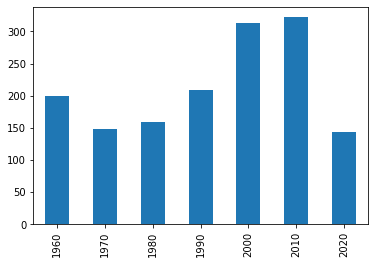

In [44]:
song_data['decade'].value_counts().sort_index().plot.bar()

In [45]:
# Save the data with the new values 
song_data.to_csv('../data/complete_playlist_data.csv', index=False) 

In [46]:
# Create a dataframe with the decade wise data
decade_wise_data = song_data.groupby(['decade']).agg({'popularity': 'mean', 'danceability': 'mean', 'acousticness': 'mean', 'energy': 'mean', 'loudness': 'mean', 'speechiness': 'mean', 'valence': 'mean', 'tempo': 'mean', 'time_signature': 'mean', 'mode': 'mean'}).reset_index()
decade_wise_data

,decade,popularity,danceability,acousticness,energy,loudness,speechiness,valence,tempo,time_signature,mode
0,1960,23.045000,0.473305,0.888760,0.463630,-10.311240,0.071575,0.661030,111.813665,3.760000,0.695000
1,1970,20.295302,0.452262,0.804436,0.518450,-9.692027,0.111017,0.573162,113.030705,3.798658,0.664430
2,1980,35.493750,0.502750,0.643889,0.560708,-9.921769,0.067389,0.620580,112.267981,3.912500,0.631250
3,1990,43.454545,0.582809,0.472145,0.612512,-10.814072,0.061380,0.690386,118.170856,3.904306,0.507177
4,2000,45.843450,0.646348,0.304943,0.682639,-8.092086,0.071678,0.622284,114.969259,3.971246,0.616613
5,2010,35.928571,0.609609,0.395880,0.665258,-7.492733,0.072129,0.614379,117.606121,3.881988,0.605590
6,2020,57.597222,0.621424,0.486561,0.548611,-8.032479,0.064659,0.451051,114.237389,3.881944,0.708333


### Top tracks of each decade

Create a list of top 10 tracks from each decade.

In [48]:
top_decade_songs = pd.DataFrame()
# Iterate through the unique decade list 
for decade in song_data['decade'].unique():
    print(decade)

    # Get the data for a particular decade and select the top 10 songs 
    decade_song_data = song_data[song_data['decade'] == decade].sort_values(by='popularity', ascending=False).head(10)

    # Create a dataframe with the decade wise data
    top_decade_songs = pd.concat([top_decade_songs, decade_song_data], axis=0)

top_decade_songs.sort_values(by='decade', ascending=True, inplace=True) 
top_decade_songs.reset_index(inplace=True, drop=True)
top_decade_songs

2010
1960
2000
1970
1980
2020
1990


,track_id,name,album,artist,release_date,length,popularity,key,acousticness,danceability,...,liveness,loudness,speechiness,tempo,valence,time_signature,mode,playlist_id,year,decade
0,59HjNZgoziKgAwGOhrKRPJ,Tere Mere Sapne Ab Ek Rang Hain,Guide,S. D. Burman,12/6/1965,0.000261,47,3,0.9780,0.246,...,0.1500,-12.103,0.0369,174.800,0.552,3,1,37i9dQZF1DXa1eCiO3E6Rr,1965,1960
1,1P278K5LuPJOatR1wBUywC,Aane Se Uske Aaye Bahar,Jeene Ki Raah,Laxmikant–Pyarelal,1/1/1969,0.000248,51,6,0.8860,0.370,...,0.0869,-14.738,0.0360,95.448,0.668,4,0,3dKv6gpADy34FI6rcP7DAT,1969,1960
2,7ukboFFuDuxKWRdxahmth7,Beqarar Karke Hamen Yun Na Jaiye,Bees Saal Baad,Hemant Kumar,1/1/1962,0.000190,51,10,0.9710,0.653,...,0.6210,-11.823,0.0483,113.465,0.757,4,0,3dKv6gpADy34FI6rcP7DAT,1962,1960
3,6xCnMMPkIIhn3QyGJgd5xd,Ae Mere Zohra Jabeen,Waqt,Ravi,7/28/1965,0.000235,52,6,0.9840,0.441,...,0.0993,-11.476,0.0742,79.582,0.514,3,0,3dKv6gpADy34FI6rcP7DAT,1965,1960
4,1AlatlIkROgLvG6pgBBnAz,Roop Tera Mastana,Aradhana,S. D. Burman,9/27/1969,0.000225,55,8,0.6660,0.449,...,0.2340,-8.787,0.0951,83.362,0.543,4,0,3dKv6gpADy34FI6rcP7DAT,1969,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2rOnSn2piaqLAlYjtfUBlY,"Raataan Lambiyan (From ""Shershaah"")","Raataan Lambiyan (From ""Shershaah"")",Tanishk Bagchi,7/30/2021,0.000230,78,10,0.6150,0.720,...,0.1080,-5.549,0.0413,81.009,0.512,4,1,37i9dQZF1DX0XUfTFmNBRM,2021,2020
66,0yCWDaAgOtg6TKlNCg9rwA,Tu Aake Dekhle,The Carnival,King,9/21/2020,0.000270,79,11,0.5150,0.770,...,0.1450,-4.022,0.1070,96.012,0.192,4,1,37i9dQZF1DX7BXvxNJkwzB,2020,2020
67,0snQrp1VaY5Pj1YIHRJpRJ,Chaand Baaliyan,Chaand Baaliyan,Aditya A,3/28/2020,0.000103,80,0,0.7960,0.729,...,0.1040,-8.980,0.0359,97.281,0.886,4,1,37i9dQZF1DX0XUfTFmNBRM,2020,2020
68,4iEGv5Ne6HuCkFCjzxdWQK,Meri Jaan,Gangubai Kathiawadi,Sanjay Leela Bhansali,2/18/2022,0.000238,75,0,0.6290,0.745,...,0.3510,-8.092,0.0406,104.018,0.693,4,0,37i9dQZF1DX0XUfTFmNBRM,2022,2020


In [50]:
song_data[song_data['decade'] == 1960].sort_values(by='popularity', ascending=False).head(10)

,track_id,name,album,artist,release_date,length,popularity,key,acousticness,danceability,...,liveness,loudness,speechiness,tempo,valence,time_signature,mode,playlist_id,year,decade
112,0es02Rp0p0WpC4WRBDtM8P,Likhe Jo Khat Tujhe,Kanyadaan,Shankar Jaikishan,1/1/1968,0.000274,57,11,0.890,0.375,...,0.3260,-13.439,0.0337,106.603,0.744,4,0,3dKv6gpADy34FI6rcP7DAT,1968,1960
63,0C47mkZ7VGcnKBvEG7PiAP,Abhi Na Jao Chhod Kar,Hum Dono,Jaidev,1/1/1961,0.000255,56,3,0.607,0.521,...,0.3290,-9.856,0.0355,96.444,0.551,3,1,3dKv6gpADy34FI6rcP7DAT,1961,1960
84,1AlatlIkROgLvG6pgBBnAz,Roop Tera Mastana,Aradhana,S. D. Burman,9/27/1969,0.000225,55,8,0.666,0.449,...,0.2340,-8.787,0.0951,83.362,0.543,4,0,3dKv6gpADy34FI6rcP7DAT,1969,1960
66,6xCnMMPkIIhn3QyGJgd5xd,Ae Mere Zohra Jabeen,Waqt,Ravi,7/28/1965,0.000235,52,6,0.984,0.441,...,0.0993,-11.476,0.0742,79.582,0.514,3,0,3dKv6gpADy34FI6rcP7DAT,1965,1960
71,7ukboFFuDuxKWRdxahmth7,Beqarar Karke Hamen Yun Na Jaiye,Bees Saal Baad,Hemant Kumar,1/1/1962,0.000190,51,10,0.971,0.653,...,0.6210,-11.823,0.0483,113.465,0.757,4,0,3dKv6gpADy34FI6rcP7DAT,1962,1960
60,1P278K5LuPJOatR1wBUywC,Aane Se Uske Aaye Bahar,Jeene Ki Raah,Laxmikant–Pyarelal,1/1/1969,0.000248,51,6,0.886,0.370,...,0.0869,-14.738,0.0360,95.448,0.668,4,0,3dKv6gpADy34FI6rcP7DAT,1969,1960
97,1kcgh8BXTRWyKG7YHmhkIW,Tum Agar Saath Dene Ka Vada Karo,Hamraaz,Ravi,10/16/1967,0.000391,50,11,0.915,0.414,...,0.1180,-10.792,0.0363,149.238,0.533,4,1,3dKv6gpADy34FI6rcP7DAT,1967,1960
104,1xNN6c8eW8Mm9uz9nVqln9,Isharon Isharon Men Dil Lenewale,Kashmir Ki Kali,O. P. Nayyar,1/1/1964,0.000290,48,5,0.964,0.439,...,0.1360,-7.341,0.0413,137.156,0.560,4,1,3dKv6gpADy34FI6rcP7DAT,1964,1960
457,59HjNZgoziKgAwGOhrKRPJ,Tere Mere Sapne Ab Ek Rang Hain,Guide,S. D. Burman,12/6/1965,0.000261,47,3,0.978,0.246,...,0.1500,-12.103,0.0369,174.800,0.552,3,1,37i9dQZF1DXa1eCiO3E6Rr,1965,1960
61,11IpCZVWahQVaRNoNX5WbF,Aap Ki Nazron Ne Samjha,Anpadh,Madan Mohan,1/1/1961,0.000235,47,4,0.818,0.339,...,0.6100,-9.576,0.0409,173.743,0.583,1,0,3dKv6gpADy34FI6rcP7DAT,1961,1960


In [54]:
top_decade_songs.to_csv('../data/top_decade_songs.csv', index=False)

## Collect the remix songs data

In [21]:
playlist_id = '7IkN3KGdUk6rw0TxIfJ3yv'

In [22]:
# Get track song IDs 
song_list = get_playlist_tracks(playlist_id)
song_data = create_track_features_dataframe(song_list, playlist_id)
song_data.shape

(63, 20)

In [23]:
# Save the data 
song_data.to_excel('../data/remix_songs_data.xlsx', index=False)